<a href="https://www.kaggle.com/lalina/exploratory-data-analysis-project?scriptVersionId=87313442" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nhanes-2015-2016/NHANES.csv


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Exploratory Data Analysis Project 

This notebook is a final assignment for EDA for Machine Learning by IBM

Table of Contents :
1. [Introduction](#section-one)
2. [Retrieving Data](#section-two)
3. [Data Cleaning](#section-three)
4. [Feature Engineering](#section-four)
5. [Hypothesis Testing](#section-five)
6. [Summary](#section-six)

<a id="#section-one"></a>
# 1. Introduction
In this final assignment, I will use a dataset from a survey held by NHANES in 2015-2016. I collected the dataset from kaggle. I will conduct descriptive and diagnostic analysis with the aim to collect and compare data of BMI in different age group and gender. 

This dataset consists of 28 columns and 5735 rows. Among 28 columns, I isolated some columns which are related to my analysis. 

Brief explanation of the column :

* SEQN = Respondent sequence number (
* SMQ020 = Smoking 
* RIAGENDR = Gender 
* RIDAGEYR = Age (years)
* DMDEDUC2 = Education level
* BMXWT  = Weight (kg)
* BMXHT = Height (cm)
* BMXBMI = BMI

<a id="#section-two"></a>
# 2. Retrieving Data

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

path = "../input/nhanes-2015-2016/NHANES.csv"
da = pd.read_csv(path)

In [4]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
da.shape

(5735, 28)

In [6]:
# Isolate the column 
data = da.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


Is there any data types which are unsuitable?

In [8]:
# Change the column names to ease the use
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']

In [9]:
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [10]:
data.shape

(5735, 8)

**Result** : dataset with 5735 rows and 8 columns. The dataset contains 3 columns with categorical data and 4 column with numerical data.
* Categorical = smoking, gender, education
* Numerical = age, weight, height, bmi

<a id="#section-three"></a>
# 3. Data Cleaning

Steps I will use in data cleaning :

1. Check for duplicate or unnecessary data
2.Check for null values or missing data
3. Check for outliers


#### 3.1 Check duplicates or unnecessary data

In [11]:
# Check for duplicates
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,seqn,smoking,gender,age,education,weight,height,bmi


There is no duplicate data in this dataset, so I will can drop the 'seqn' column because every row contains unique data so it doesn't give much explanation about the data. 

In [12]:
data.drop(columns = 'seqn', inplace = True)

In [13]:
data.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


#### 3.2 Check for missing values and handle them

In [14]:
# Check for missing data
data.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

I have missing values in column education, weight, height, and bmi. For education, I think it is better to drop them because filling the missed value might mislead the real data. For weight, height and bmi, I will drop them too because the number of missing values are very small compared to the dataset (>5000 rows).

In [15]:
# Dataset before handling missing values
data.shape

(5735, 7)

In [16]:
# Drop the missing values
data.dropna(inplace = True)

In [17]:
#Dataset after missing values are dropped
data.shape

(5406, 7)

#### 3.3 Find outliers and handle outliers

I have three numerical data (weight, height and bmi), so I will try to find outliers from these columns using histogram and boxplot.

In [18]:
# Descriptive analysis of numerical data
numerical = ['age','weight','height','bmi']
data[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


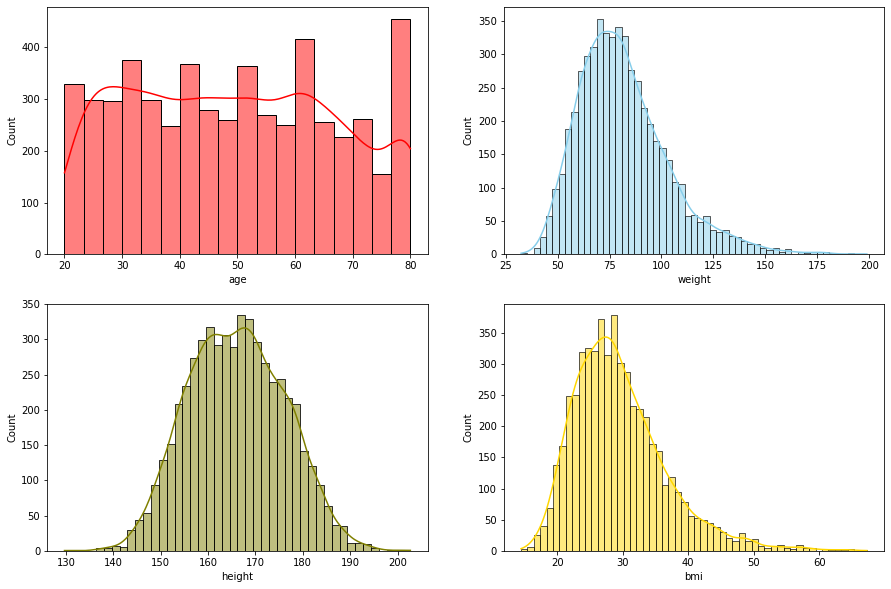

In [19]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])

plt.show()

From histograms, I observe that height has a normal distribution curve while weight and bmi have a bit of right-skewed distribution.

<AxesSubplot:xlabel='bmi'>

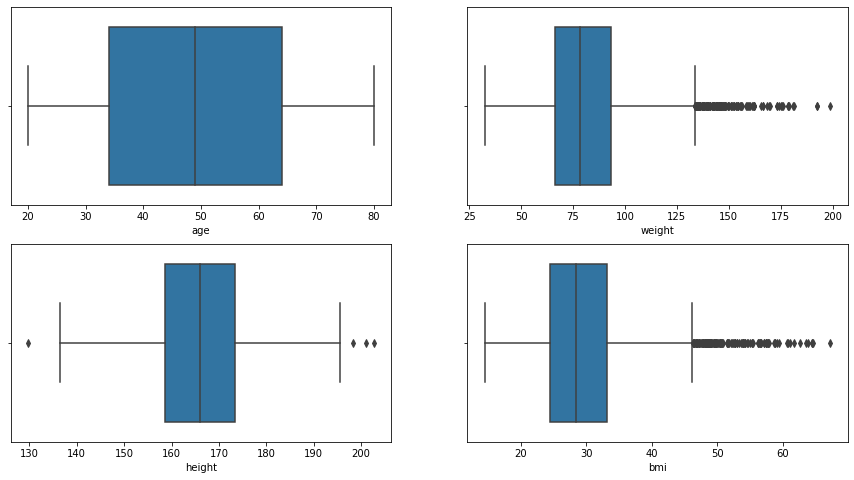

In [20]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

According to the boxplots, age variable has no outliers. Height has normal distribution with few outliers. Meanwhile, weight and bmi have more outliers in the upper values. 

Based on the observation of histogram and boxplot, I decided the outliers to be outside of IQR.

In [21]:
# Height
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [22]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [23]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [24]:
data.shape

(5252, 7)

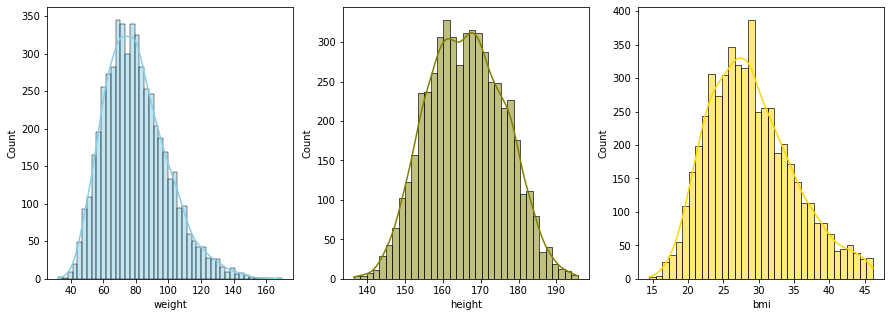

In [25]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

<AxesSubplot:xlabel='bmi'>

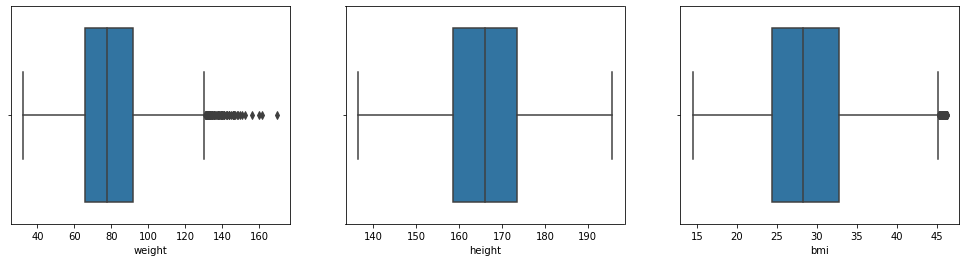

In [26]:
fig, axs = plt.subplots(1,3, figsize=(17, 4))
sns.boxplot(data['weight'], ax = axs[0])
sns.boxplot(data['height'], ax = axs[1])
sns.boxplot(data['bmi'], ax = axs[2])

**Result** : the numerical values have been removed from outliers, the result is data with normal distribution.

<a id="#section-four"></a>
# 4. Feature Engineering
1. One hot encoding for categorical data
2. Log transform of skewed variables
3. Pairplot features

#### 4.1 One hot encoding for categorical data

Since the categorical data have been in a type of int, I would translate them to object data type to make tho encoding easier. 

In [27]:
# smoking
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})

#education
data['education'] = data.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [28]:
# Get the categorical data
categorical = data[['smoking','gender','education']]
categorical.head() 

,smoking,gender,education
0,yes,male,College or above
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,College or above
4,no,female,Some college / AA


In [29]:
dummy = pd.get_dummies(categorical,drop_first=True)
dummy

,smoking_yes,gender_male,education_9-11th grade,education_<9th grade,education_College or above,education_HS or GED,education_Some college / AA
0,1,1,0,0,1,0,0
1,1,1,0,0,0,1,0
2,1,1,0,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
5730,1,0,0,0,0,1,0
5731,0,1,0,0,1,0,0
5732,1,0,0,0,0,0,1
5733,1,1,0,1,0,0,0


#### 4.2 Log transform of skewed variables

In [30]:
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age       0.107088
weight    0.653454
height    0.077404
bmi       0.520106
dtype: float64

In my data, I don't have variable with skew limit more than 0.75

#### 4.3 Pairplot Feature

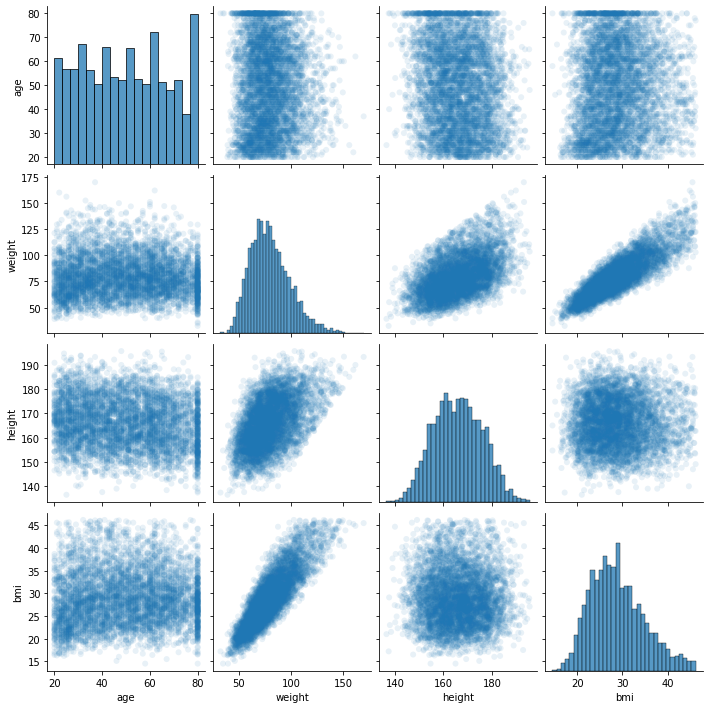

In [31]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

From pairplot above, I observe that weight has a positive correlation with BMI. Height and weight are also slightly positively correlated.

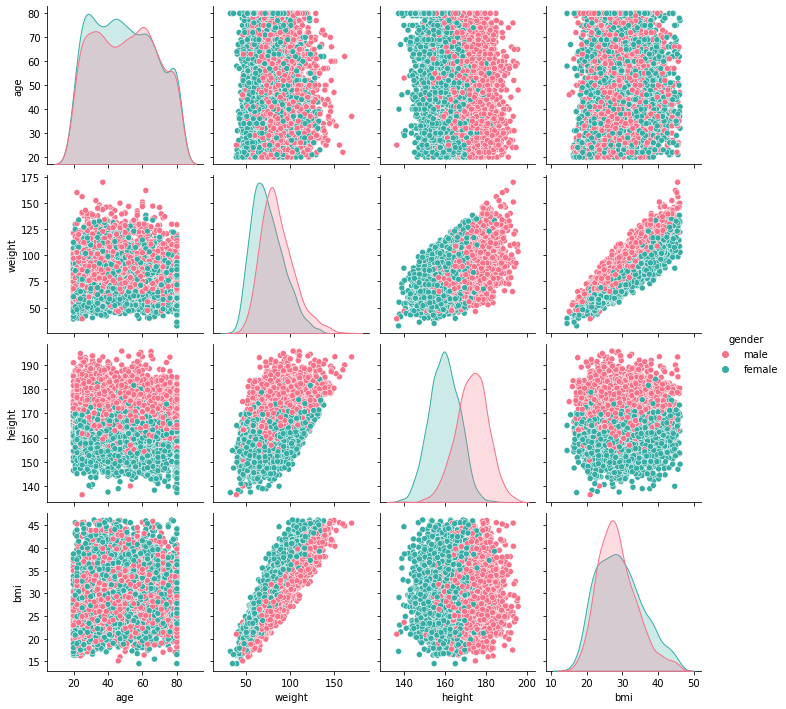

In [32]:
sns.pairplot(data, hue = 'gender', palette = 'husl')

If I look at the pairplot according to gender, I can observe that in all ages, male relatively has higher weight and height distribution but varied in BMI distribution.

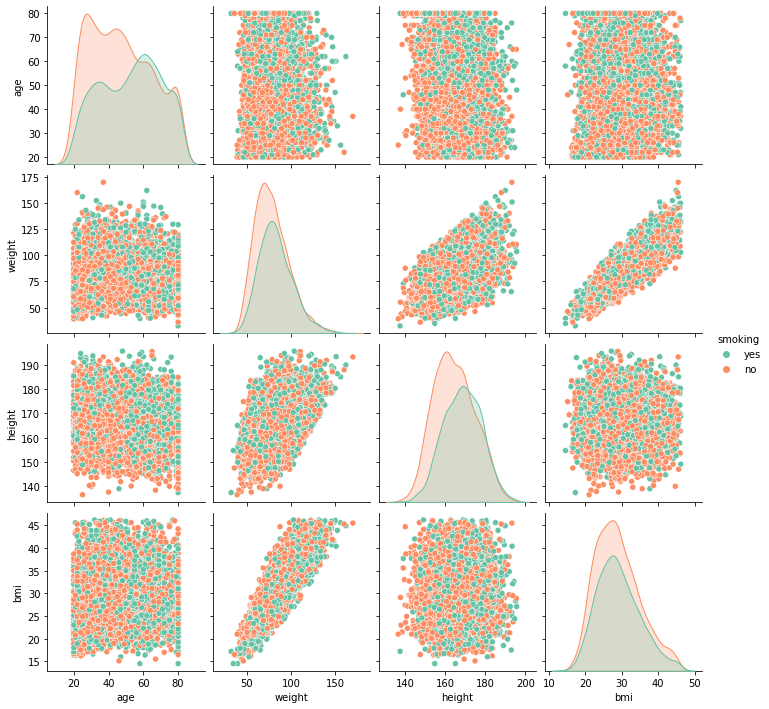

In [33]:
sns.pairplot(data, hue = 'smoking', palette = 'Set2')

However, according to smoking habit, I see not much difference in distribution of weight, height or bmi in various age. 

<a id="#section-five"></a>
# 5. Hypothesis Testing

In this section, I will create hypotheses and test them.
1. Create hypotheses
2. Statistical test
3. Conclusion

Before creating a hypotheses, I would like to look at the data first.
  

In [34]:
# Stratify the age
data['age'] = pd.cut(data.age, [18,30,40,50,60,70,80])

In [35]:
# Group categorical data
data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})
data_cat.columns = ['proportion','size']
data_cat

proportion  size
age      gender                  
(18, 30] female    0.234522   533
         male      0.375824   455
(30, 40] female    0.282222   450
         male      0.503401   441
(40, 50] female    0.262605   476
         male      0.447028   387
(50, 60] female    0.424036   441
         male      0.568849   443
(60, 70] female    0.382423   421
         male      0.651551   419
(70, 80] female    0.327456   397
         male      0.652956   389

In [36]:
# Group numerical data
data_num = data[['gender','age','weight','height','bmi']]
data_num.groupby(['age','gender']).agg(['mean','std'])

weight                 height                  bmi  \
                      mean        std        mean       std       mean   
age      gender                                                          
(18, 30] female  71.971295  18.605828  161.450094  6.867726  27.558161   
         male    83.320879  19.261460  174.909890  7.701208  27.183297   
(30, 40] female  76.091111  19.726570  160.744444  7.207113  29.344889   
         male    88.335147  19.706370  174.084354  7.755265  29.067347   
(40, 50] female  77.595168  18.692238  160.225630  7.163041  30.174370   
         male    88.724548  19.747783  173.806202  7.563134  29.247028   
(50, 60] female  75.917007  16.789526  159.985261  6.917037  29.602041   
         male    86.674266  18.809328  172.935892  8.383587  28.866591   
(60, 70] female  75.776485  17.716172  158.029929  6.982854  30.254157   
         male    86.022196  18.078713  171.831742  7.290485  29.017422   
(70, 80] female  70.566247  15.371260  156.253401  6.688228  28.836272   
         male    81.334704  16.850614  170.379177  7.485395  27.899743   

                           
                      std  
age      gender            
(18, 30] female  6.624561  
         male    5.771789  
(30, 40] female  6.871599  
         male    5.684898  
(40, 50] female  6.717175  
         male    5.654652  
(50, 60] female  5.933152  
         male    5.282098  
(60, 70] female  6.356145  
         male    5.208027  
(70, 80] female  5.698754  
         male    4.847672

In [37]:
pd.crosstab(data.gender, data.age)

age,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
gender,,,,,,
female,533,450,476,441,421,397
male,455,441,387,443,419,389


#### 5.1 Create 3 hypotheses
    1. H01 = Female age 40-50 not obese
    2. H02 = Proportion of male smoker is no difference than the proportion of female smoker.
    3. H03 = BMI of male and female are similar.

#### 5.2 Hypothesis testing

I will test the first hypothesis (H01). According to WHO, BMI > 30 is classified as obese. I would like to test if female in age range 40-50 are obese or not. I will use confidence interval of 90% (significance = 5%), one-tailed test.

* **null hypothesis H01** : Female age 40-50 are not obese. (BMI = 30.174370)
* **alternative hypothesis** : Female age 40-50 are obese. (BMI > 30)

In [38]:
# From the table above collect information about female age 40-50
mean_bmi = 30.174370
std_bmi = 6.717175
n_bmi = 476

Because the number of sample is quite big (476 samples), it met the assumption of CLT. 
So let's start to count the standard error and t-value

In [39]:
# Standard Error of Mean
sem = mean_bmi/np.sqrt(n_bmi)

#t-value or z_score
t_value = (mean_bmi - 30) / sem 

print('sem:', sem, 't_value:', t_value)

sem: 1.3830399813886576 t_value: 0.12607733857767542


**Result**
t_value = 0.13
p_value = 0.45

**Conclusion**
The p_value is 0.45 which is bigger then significance value of 0.05 so I can not reject the null hypothesis. In other words, the female age 40-50 are not obese and still considered as overweight. 

<a id="#section-six"></a>
# 6. Summary

In summary, the dataset I use here relatively friendly and did not need too much intervention for data cleaning because it has no duplicated data and small number of missing values. Besides, the data are also large enough to analyse for various purpose. The distribution of data I used for BMI analysis are also mostly normally distributed or slightly-skewed which make the future modelling more simple.

For further analysis and more accurate modelling, I would encourage to use more variables in the dataset to find more variables which are probably correlated with BMI. There are also some potential that these variables I did not use here were probably skewed and needed more feature engineering process. 


**Thank you for reading my assignment. I am looking forward for your inputs. :)**

Reading list :
* https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL 
* https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=Examination&Cycle=2015-2016